In [3]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import pecanpy

In [4]:
%matplotlib inline
plt.style.use("ggplot")

In [5]:
pd.__version__

'0.22.0'

In [6]:
# define user credentials
USER_NAME = ???
PASSWORD = ???

# define relevant schema name
SCHEMA = ???

# create the engine that connects to the database...
local_engine = pecanpy.create_local_engine(USER_NAME, PASSWORD)

In [7]:
with local_engine.connect() as con:
    metadata_df = pecanpy.read_metadata_table(con, schema=SCHEMA)

In [8]:
metadata_df.head()

,active_record,building_type,program_579,program_baseline,program_energy_internet_demo,program_lg_appliance,program_verizon,program_ccet_group,program_civita_group,city,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
dataid,,,,,,,,,,,,,,,,,,,,,
5545,True,Single-Family Home,False,True,True,False,False,CCET - Control,None,Austin,...,True,False,False,False,False,False,False,False,False,False
9160,True,Single-Family Home,False,True,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
2199,True,Single-Family Home,False,False,True,False,False,CCET - Portal Only,None,Austin,...,True,False,False,False,False,False,False,False,False,False
5026,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,True,False,False,False,False,False,False,False,False,False
7335,True,Single-Family Home,False,False,True,False,False,None,None,Austin,...,False,False,False,False,False,False,False,False,False,False


In [9]:
time = datetime.datetime.now()
seed = time.hour * 10000 + time.minute * 100 + time.second
prng = np.random.RandomState(seed)
with_egauge_data = metadata_df[metadata_df.egauge_min_time.notnull()]
random_household = with_egauge_data.sample(n=1, random_state=prng)

In [10]:
# how much available data possibly exists?
start_time = random_household.iloc[0].egauge_min_time
end_time = random_household.iloc[0].egauge_max_time
time_delta = end_time - start_time

In [11]:
time_delta

Timedelta('166 days 23:59:00')

In [12]:
with local_engine.connect() as local_con:

    # extract the required parameters
    dataid = random_household.iloc[0].name
    start_time = random_household.iloc[0].egauge_min_time
    end_time = random_household.iloc[0].egauge_max_time

    # pull down data for different aggregations
    minutes_df = pecanpy.read_electricity_egauge_minutes_query(local_con, SCHEMA, dataid, start_time, end_time)
    qtr_hour_df = pecanpy.read_electricity_egauge_15min_query(local_con, SCHEMA, dataid, start_time, end_time)
    hours_df = pecanpy.read_electricity_egauge_hours_query(local_con, SCHEMA, dataid, start_time, end_time)

## Minutes data

In [13]:
minutes_df.shape

(240459, 68)

In [14]:
minutes_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2014-02-22 18:00:00-06:00,4927,0.502,0.0,None,None,None,None,0.0,0.0,None,...,0.170,None,None,None,None,None,None,None,None,None
2014-02-22 18:01:00-06:00,4927,0.501,0.0,None,None,None,None,0.0,0.0,None,...,0.170,None,None,None,None,None,None,None,None,None
2014-02-22 18:02:00-06:00,4927,0.502,0.0,None,None,None,None,0.0,0.0,None,...,0.169,None,None,None,None,None,None,None,None,None
2014-02-22 18:03:00-06:00,4927,0.501,0.0,None,None,None,None,0.0,0.0,None,...,0.169,None,None,None,None,None,None,None,None,None
2014-02-22 18:04:00-06:00,4927,0.502,0.0,None,None,None,None,0.0,0.0,None,...,0.168,None,None,None,None,None,None,None,None,None


In [15]:
minutes_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localminute,,,,,,,,,,,,,,,,,,,,,
2014-08-08 18:54:00-05:00,4927,2.855,2.115,None,None,None,None,0.004,0.0,None,...,0.0,None,None,None,None,None,None,None,None,None
2014-08-08 18:55:00-05:00,4927,2.853,2.111,None,None,None,None,0.004,0.0,None,...,0.0,None,None,None,None,None,None,None,None,None
2014-08-08 18:56:00-05:00,4927,2.855,2.123,None,None,None,None,0.004,0.0,None,...,0.0,None,None,None,None,None,None,None,None,None
2014-08-08 18:57:00-05:00,4927,2.863,2.128,None,None,None,None,0.005,0.0,None,...,0.0,None,None,None,None,None,None,None,None,None
2014-08-08 18:58:00-05:00,4927,2.840,2.108,None,None,None,None,0.005,0.0,None,...,0.0,None,None,None,None,None,None,None,None,None


In [16]:
# if gen is not null, then household is a prosumer!
minutes_df[["grid", "use", "gen"]].head()

,grid,use,gen
localminute,,,
2014-02-22 18:00:00-06:00,0.502,0.502,None
2014-02-22 18:01:00-06:00,0.501,0.501,None
2014-02-22 18:02:00-06:00,0.502,0.502,None
2014-02-22 18:03:00-06:00,0.501,0.501,None
2014-02-22 18:04:00-06:00,0.502,0.502,None


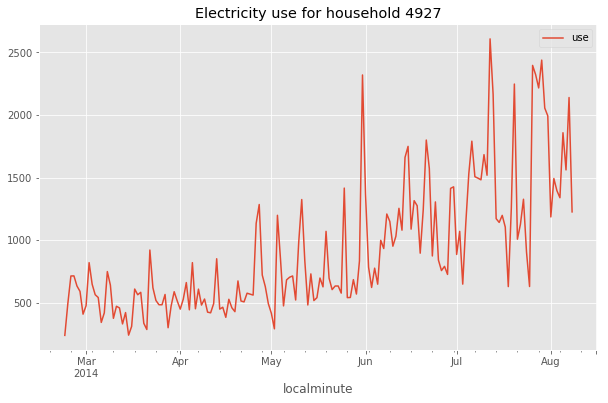

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# plot total daily electricity usage
minutes_df.use.resample("D").sum().plot(ax=ax, label="use")
ax.set_title("Electricity use for household {}".format(dataid))
ax.legend()
plt.show()

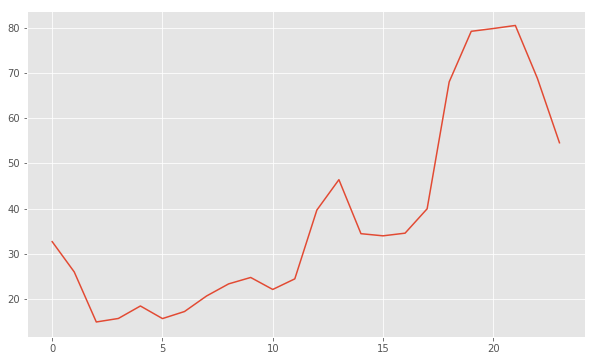

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
hourly_load_curves = (minutes_df.resample("H")
                               .sum()
                               .groupby(lambda idx: idx.hour)
                               .mean())
hourly_load_curves.use.plot(ax=ax);

## 15-minute data

In [19]:
qtr_hour_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
local_15min,,,,,,,,,,,,,,,,,,,,,
2014-02-22 18:00:00-06:00,4927,0.502667,0.0,None,None,None,None,0.0000,0.003800,None,...,0.165467,None,None,None,None,None,None,None,None,None
2014-02-22 18:15:00-06:00,4927,0.548400,0.0,None,None,None,None,0.0022,0.069133,None,...,0.153667,None,None,None,None,None,None,None,None,None
2014-02-22 18:30:00-06:00,4927,0.455333,0.0,None,None,None,None,0.0006,0.089400,None,...,0.032667,None,None,None,None,None,None,None,None,None
2014-02-22 18:45:00-06:00,4927,0.417333,0.0,None,None,None,None,0.0000,0.074533,None,...,0.007133,None,None,None,None,None,None,None,None,None
2014-02-22 19:00:00-06:00,4927,0.361133,0.0,None,None,None,None,0.0000,0.000000,None,...,0.015667,None,None,None,None,None,None,None,None,None


In [20]:
qtr_hour_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
local_15min,,,,,,,,,,,,,,,,,,,,,
2014-08-08 16:45:00-05:00,4927,3.051733,2.119467,None,None,None,None,0.004933,0.0,None,...,0.169267,None,None,None,None,None,None,None,None,None
2014-08-08 17:00:00-05:00,4927,2.981600,2.116333,None,None,None,None,0.004800,0.0,None,...,0.170133,None,None,None,None,None,None,None,None,None
2014-08-08 17:15:00-05:00,4927,2.994667,2.110400,None,None,None,None,0.013867,0.0,None,...,0.160133,None,None,None,None,None,None,None,None,None
2014-08-08 17:30:00-05:00,4927,2.924400,2.114600,None,None,None,None,0.008933,0.0,None,...,0.084600,None,None,None,None,None,None,None,None,None
2014-08-08 17:45:00-05:00,4927,2.838467,2.109933,None,None,None,None,0.004133,0.0,None,...,0.000000,None,None,None,None,None,None,None,None,None


In [21]:
# can recover the 15-minute data ay aggregating the minutes data!
minutes_df.resample("15T").mean().tail()

,dataid,use,air1,bathroom1,bathroom2,clotheswasher_dryg1,furnace1,grid,kitchenapp1,kitchenapp2,range1,refrigerator1
localminute,,,,,,,,,,,,
2014-08-08 17:45:00-05:00,4927.0,3.051733,2.119467,0.004933,0.0,0.0,0.223867,3.051733,0.0,0.0000,0.0,0.169267
2014-08-08 18:00:00-05:00,4927.0,2.981600,2.116333,0.004800,0.0,0.0,0.225333,2.981600,0.0,0.0000,0.0,0.170133
2014-08-08 18:15:00-05:00,4927.0,2.994667,2.110400,0.013867,0.0,0.0,0.225000,2.994667,0.0,0.0000,0.0,0.160133
2014-08-08 18:30:00-05:00,4927.0,2.924400,2.114600,0.008933,0.0,0.0,0.225200,2.924400,0.0,0.0018,0.0,0.084600
2014-08-08 18:45:00-05:00,4927.0,2.838857,2.109500,0.004143,0.0,0.0,0.225286,2.838857,0.0,0.0040,0.0,0.000000


## Hours data

In [22]:
hours_df.head()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2014-02-22 18:00:00-06:00,4927,0.480933,0.0,None,None,None,None,0.00070,0.059217,None,...,0.089733,None,None,None,None,None,None,None,None,None
2014-02-22 19:00:00-06:00,4927,0.447150,0.0,None,None,None,None,0.00035,0.001583,None,...,0.104683,None,None,None,None,None,None,None,None,None
2014-02-22 20:00:00-06:00,4927,0.559767,0.0,None,None,None,None,0.00075,0.002367,None,...,0.121517,None,None,None,None,None,None,None,None,None
2014-02-22 21:00:00-06:00,4927,0.825417,0.0,None,None,None,None,0.01735,0.001867,None,...,0.119617,None,None,None,None,None,None,None,None,None
2014-02-22 22:00:00-06:00,4927,1.189583,0.0,None,None,None,None,0.02355,0.004167,None,...,0.128550,None,None,None,None,None,None,None,None,None


In [23]:
hours_df.tail()

,dataid,use,air1,air2,air3,airwindowunit1,aquarium1,bathroom1,bathroom2,bedroom1,...,refrigerator1,refrigerator2,security1,shed1,sprinkler1,utilityroom1,venthood1,waterheater1,waterheater2,winecooler1
localhour,,,,,,,,,,,,,,,,,,,,,
2014-08-08 13:00:00-05:00,4927,2.396833,2.106200,None,None,None,None,0.004983,0.00000,None,...,0.077433,None,None,None,None,None,None,None,None,None
2014-08-08 14:00:00-05:00,4927,2.251983,1.974700,None,None,None,None,0.004717,0.00000,None,...,0.059250,None,None,None,None,None,None,None,None,None
2014-08-08 15:00:00-05:00,4927,1.874100,1.385183,None,None,None,None,0.004217,0.00000,None,...,0.133600,None,None,None,None,None,None,None,None,None
2014-08-08 16:00:00-05:00,4927,1.168717,0.529867,None,None,None,None,0.003567,0.05585,None,...,0.105517,None,None,None,None,None,None,None,None,None
2014-08-08 17:00:00-05:00,4927,2.934783,2.112817,None,None,None,None,0.007933,0.00000,None,...,0.103717,None,None,None,None,None,None,None,None,None


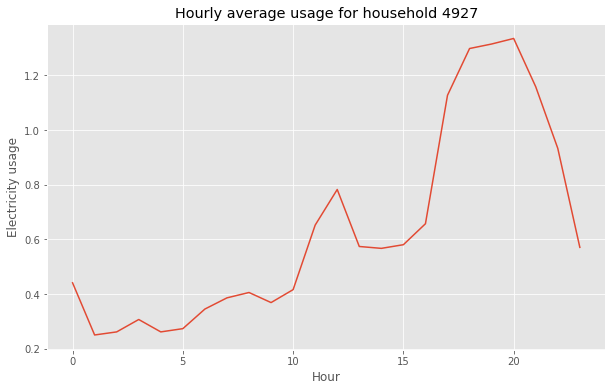

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.set_xlabel("Hour")
ax.set_ylabel("Electricity usage")
ax.set_title("Hourly average usage for household {}".format(dataid))
hours_df.use.groupby(lambda idx: idx.hour).mean().plot(ax=ax);
